# Heart Attack Analysis & Prediction Project
+Author : Jaeha Huh

# 1. Introduction

+ This is a data set for Heart Attack and each line represents patient information.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   #graph output
import matplotlib as mpl    #graph option
import warnings
warnings.filterwarnings('ignore')

#Graph Visualization Options Settings Function
%matplotlib inline

#Avoid breaking when negative values appear on the graph
mpl.rc('axes',unicode_minus=False)

In [2]:
# Data Load
data=pd.read_csv('heart.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# General information such as observations, column types, and missing rates in the data
def str_summary(df, pred=None): 
  obs = df.shape[0]
  types = df.dtypes
  counts = df.apply(lambda x: x.count())
  uniques = df.apply(lambda x: [x.unique()]).T.squeeze()
  nulls = df.apply(lambda x: x.isnull().sum())
  distincts = df.apply(lambda x: x.unique().shape[0])
  missing_ratio = (df.isnull().sum()/ obs) * 100
  
  print('Data shape:', df.shape)
    
  cols = ['Types', 'Counts', 'Distincts', 'Nulls', 'Missing_ratio', 'Uniques']
  structure = pd.concat([types, counts, distincts, nulls, missing_ratio, uniques], axis = 1, sort=True)

  structure.columns = cols
  
  print('___________________________\nData types:\n',structure.Types.value_counts())
  print('___________________________')

  return structure

data_summary = str_summary(data)
data_summary

Data shape: (303, 14)
___________________________
Data types:
 int64      13
float64     1
Name: Types, dtype: int64
___________________________


,Types,Counts,Distincts,Nulls,Missing_ratio,Uniques
age,int64,303,41,0,0.0,"[63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 5..."
caa,int64,303,5,0,0.0,"[0, 2, 1, 3, 4]"
chol,int64,303,152,0,0.0,"[233, 250, 204, 236, 354, 192, 294, 263, 199, ..."
cp,int64,303,4,0,0.0,"[3, 2, 1, 0]"
exng,int64,303,2,0,0.0,"[0, 1]"
fbs,int64,303,2,0,0.0,"[1, 0]"
oldpeak,float64,303,40,0,0.0,"[2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, ..."
output,int64,303,2,0,0.0,"[1, 0]"
restecg,int64,303,3,0,0.0,"[0, 1, 2]"
sex,int64,303,2,0,0.0,"[1, 0]"


# 2. Analysis

<AxesSubplot:xlabel='output', ylabel='count'>

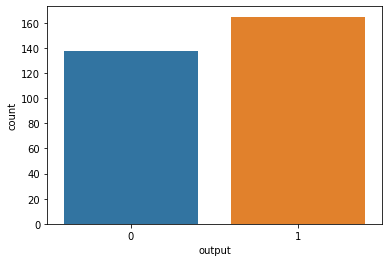

In [4]:
# Identifies class distribution of dependent variable output
# The ratio of 1 is a little higher.
sns.countplot(data=data, x='output')

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'chol'),
 Text(2.5, 0, 'oldpeak'),
 Text(3.5, 0, 'thalachh'),
 Text(4.5, 0, 'trtbps')]

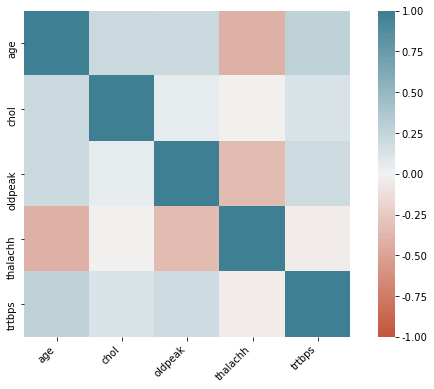

In [5]:
# Proceed correlation visualization by continuous variables
corr = data[['age','chol', 'oldpeak', 'thalachh', 'trtbps']].corr()
plt.figure(figsize=(10,6))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

<AxesSubplot:xlabel='output', ylabel='trtbps'>

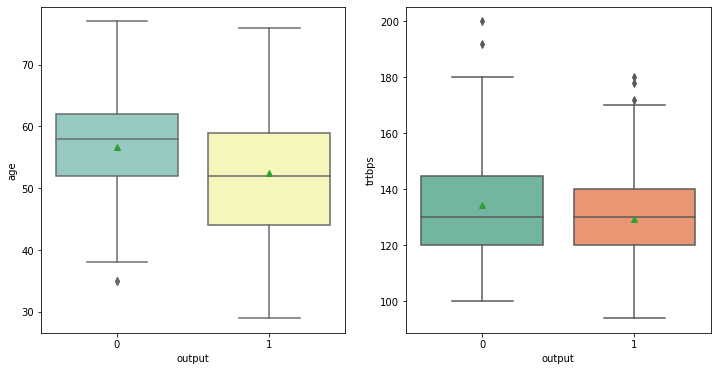

In [6]:
figure, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(12,6)

sns.boxplot(x='output', y='age', data=data, palette='Set3',showmeans=True,ax=ax1) # boxplot of output and age
sns.boxplot(x='output', y='trtbps', data=data, palette='Set2',showmeans=True,ax=ax2) # boxplot of output and trtbps

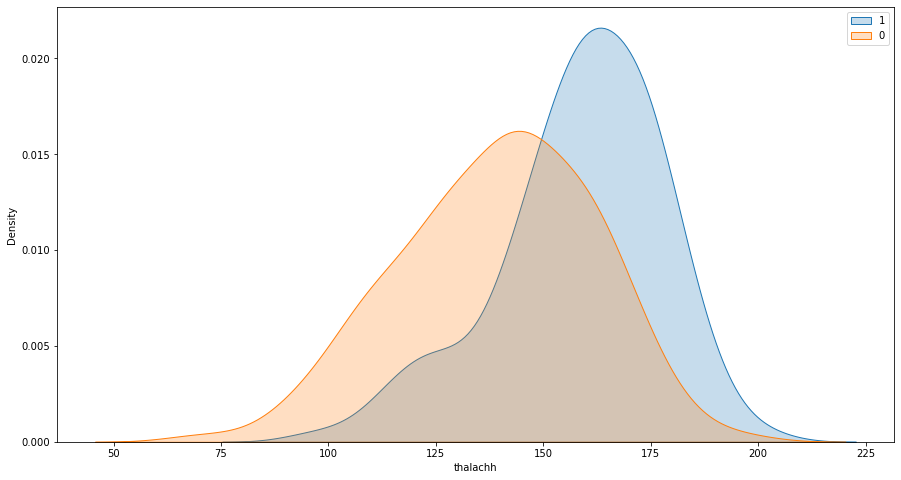

In [7]:
# distplot of output and thalachh
plt.figure(figsize=(15,8))
a=data['output'].unique()
for i, name in enumerate(a):
    sns.kdeplot(data[data['output'] == name]['thalachh'], label=name,legend=True,shade=True)
plt.legend()

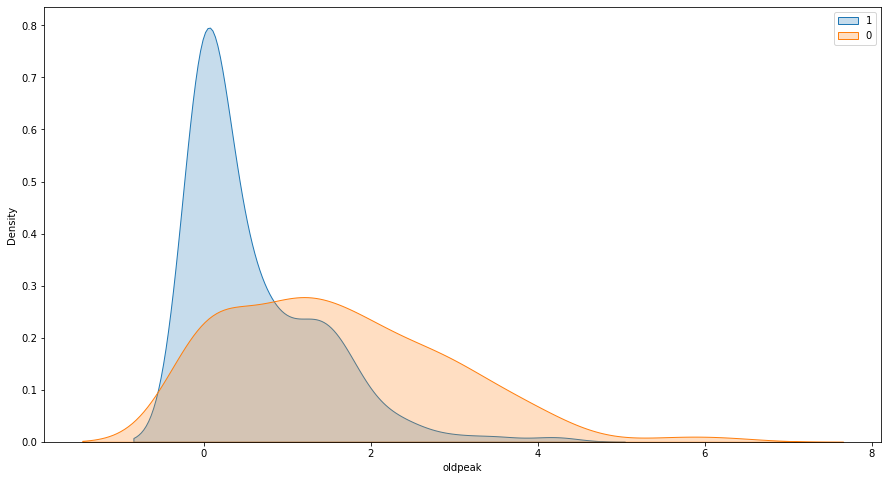

In [8]:
# distplot of output and oldpeak
plt.figure(figsize=(15,8))
for i, name in enumerate(a):
    sns.kdeplot(data[data['output'] == name]['oldpeak'], label=name,legend=True,shade=True)
plt.legend()

# 3.Supervised analysis

< Modeling >
+ Modeling steps use Logistic Regression, SVM, Neural Networks

< Comment about module>
+ we use StrandardScaler for normalization.
+ Also, we use Dropout for Neural Network. Dropout is a method of preventing some units of a network from working. In short, it is a way to prevent some units in the hidden layer from being overfitted by disabling them.
+ (The dropout module requires the keras library to be installed.)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report 
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [10]:
# Declaration ofindependent and dependent variables
X=data.drop('output',axis=1)
Y=data['output']

In [11]:
# Split Train Test Set 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

print('Train set:',X_train.shape,',',Y_train.shape)
print('Test set:',X_test.shape,',',Y_test.shape)

Train set: (212, 13) , (212,)
Test set: (91, 13) , (91,)


In [12]:
# A function that normalizes a continuous variable to recreate a set of independent variables
def st_scale():
  st=StandardScaler()
  st.fit(X[['age','chol', 'oldpeak', 'thalachh', 'trtbps']])
  X_scale=st.transform(X[['age','chol', 'oldpeak', 'thalachh', 'trtbps']])

  temp=np.array(X.drop(['age','chol', 'oldpeak', 'thalachh', 'trtbps'],axis=1))
  X_scale=np.concatenate((temp, X_scale), axis=1)

  return X_scale

In [13]:
# Declaration of Normalized Independent and Dependent Variables
X_scale=st_scale()
Y_=np.array(Y)

X_train_s,X_test_s,Y_train_s,Y_test_s=train_test_split(X_scale,Y_,test_size=0.3,random_state=101)

In [14]:
# K-fold Cross Validation function
def k_cv(x,y,model,n_split):
  kfold=KFold(n_splits=n_split,random_state=101)
  cv_score=[]

  x=x
  y=y
  model=model

  n_iter=0
  for train_index, test_index in kfold.split(x):
    x_train, x_test=x[train_index],x[test_index]
    y_train, y_test=y[train_index],y[test_index]
    
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    
    n_iter=n_iter+1
    
    acc_train=accuracy_score(y_train,y_pred_train)
    acc_test=accuracy_score(y_test,y_pred_test)
    cv_score.append(acc_test)
    
    print("Modeling ",n_iter,"st")
    print('train set accuracy_score: ',acc_train)
    print('test set accuracy_score: ',acc_test)
    print("-----------------------------------------")
    
  print('Mean test set accuracy_score: ',np.mean(cv_score))


## Logistic Regression


In [15]:
# CV results if not normalized
k_cv(X_train.values,Y_train.values,LogisticRegression(),n_split=5)

Modeling  1 st
train set accuracy_score:  0.8698224852071006
test set accuracy_score:  0.7674418604651163
-----------------------------------------
Modeling  2 st
train set accuracy_score:  0.8402366863905325
test set accuracy_score:  0.813953488372093
-----------------------------------------
Modeling  3 st
train set accuracy_score:  0.8705882352941177
test set accuracy_score:  0.8333333333333334
-----------------------------------------
Modeling  4 st
train set accuracy_score:  0.8705882352941177
test set accuracy_score:  0.7380952380952381
-----------------------------------------
Modeling  5 st
train set accuracy_score:  0.8294117647058824
test set accuracy_score:  0.9761904761904762
-----------------------------------------
Mean test set accuracy_score:  0.8258028792912514


In [16]:
# test set evaluation if not normalized
lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)

print('Accuracy: ',accuracy_score(Y_test,pred),'\n')
print(classification_report(Y_test,pred,labels=[0,1]))

Accuracy:  0.8791208791208791 

              precision    recall  f1-score   support

           0       0.95      0.80      0.86        44
           1       0.83      0.96      0.89        47

    accuracy                           0.88        91
   macro avg       0.89      0.88      0.88        91
weighted avg       0.89      0.88      0.88        91



In [17]:
# CV results if normalized
k_cv(X_train_s,Y_train_s,LogisticRegression(),n_split=5)

Modeling  1 st
train set accuracy_score:  0.8520710059171598
test set accuracy_score:  0.813953488372093
-----------------------------------------
Modeling  2 st
train set accuracy_score:  0.863905325443787
test set accuracy_score:  0.7906976744186046
-----------------------------------------
Modeling  3 st
train set accuracy_score:  0.8705882352941177
test set accuracy_score:  0.8333333333333334
-----------------------------------------
Modeling  4 st
train set accuracy_score:  0.8705882352941177
test set accuracy_score:  0.7380952380952381
-----------------------------------------
Modeling  5 st
train set accuracy_score:  0.8117647058823529
test set accuracy_score:  0.9523809523809523
-----------------------------------------
Mean test set accuracy_score:  0.8256921373200443


In [18]:
# test set evaluation if normalized
lr=LogisticRegression()
lr.fit(X_train_s,Y_train_s)
pred=lr.predict(X_test_s)

print('Accuracy: ',accuracy_score(Y_test_s,pred),'\n')
print(classification_report(Y_test_s,pred,labels=[0,1]))

Accuracy:  0.8681318681318682 

              precision    recall  f1-score   support

           0       0.92      0.80      0.85        44
           1       0.83      0.94      0.88        47

    accuracy                           0.87        91
   macro avg       0.88      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [19]:
# Hyper-parameter Tuning
# Tuned to non-normalized cases because it performed better without normalization

print('################ C = 0.1 ################')
k_cv(X_train.values,Y_train.values,LogisticRegression(C=0.1),n_split=5)
print('\n\n')

print('################ C = 0.5 ################')
k_cv(X_train.values,Y_train.values,LogisticRegression(C=0.5),n_split=5)
print('\n\n')

print('################ C = 1 ################')
k_cv(X_train.values,Y_train.values,LogisticRegression(C=1),n_split=5)
print('\n\n')

print('################ C = 3 ################')
k_cv(X_train.values,Y_train.values,LogisticRegression(C=3),n_split=5)
print('\n\n')

print('################ C = 5 ################')
k_cv(X_train.values,Y_train.values,LogisticRegression(C=5),n_split=5)

################ C = 0.1 ################
Modeling  1 st
train set accuracy_score:  0.8520710059171598
test set accuracy_score:  0.7906976744186046
-----------------------------------------
Modeling  2 st
train set accuracy_score:  0.8284023668639053
test set accuracy_score:  0.7441860465116279
-----------------------------------------
Modeling  3 st
train set accuracy_score:  0.8411764705882353
test set accuracy_score:  0.8333333333333334
-----------------------------------------
Modeling  4 st
train set accuracy_score:  0.8588235294117647
test set accuracy_score:  0.8095238095238095
-----------------------------------------
Modeling  5 st
train set accuracy_score:  0.8176470588235294
test set accuracy_score:  0.9285714285714286
-----------------------------------------
Mean test set accuracy_score:  0.8212624584717609



################ C = 0.5 ################
Modeling  1 st
train set accuracy_score:  0.863905325443787
test set accuracy_score:  0.7906976744186046
------------------

In [20]:
# C=0.5 & Enforce normalization
# Model with the highest accuracy as a result of CV
lr=LogisticRegression(C=0.5)
lr.fit(X_train_s,Y_train_s)
pred=lr.predict(X_test_s)

print('Accuracy: ',accuracy_score(Y_test_s,pred),'\n')
print(classification_report(Y_test_s,pred,labels=[0,1]))

Accuracy:  0.8571428571428571 

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        44
           1       0.81      0.94      0.87        47

    accuracy                           0.86        91
   macro avg       0.87      0.85      0.86        91
weighted avg       0.87      0.86      0.86        91



## SVM

In [21]:
# CV results if not normalized
k_cv(X_train.values,Y_train.values,SVC(),n_split=5)

Modeling  1 st
train set accuracy_score:  0.6153846153846154
test set accuracy_score:  0.5116279069767442
-----------------------------------------
Modeling  2 st
train set accuracy_score:  0.6272189349112426
test set accuracy_score:  0.5813953488372093
-----------------------------------------
Modeling  3 st
train set accuracy_score:  0.6176470588235294
test set accuracy_score:  0.5714285714285714
-----------------------------------------
Modeling  4 st
train set accuracy_score:  0.6470588235294118
test set accuracy_score:  0.5952380952380952
-----------------------------------------
Modeling  5 st
train set accuracy_score:  0.6294117647058823
test set accuracy_score:  0.6666666666666666
-----------------------------------------
Mean test set accuracy_score:  0.5852713178294573


In [22]:
#test set evaluation if not normalized
svm=SVC()
svm.fit(X_train,Y_train)
pred=svm.predict(X_test)

print('Accuracy: ',accuracy_score(Y_test,pred),'\n')
print(classification_report(Y_test,pred,labels=[0,1]))

Accuracy:  0.6703296703296703 

              precision    recall  f1-score   support

           0       0.77      0.45      0.57        44
           1       0.63      0.87      0.73        47

    accuracy                           0.67        91
   macro avg       0.70      0.66      0.65        91
weighted avg       0.70      0.67      0.65        91



In [23]:
# CV results if normalized
k_cv(X_train_s,Y_train_s,SVC(),n_split=5)

Modeling  1 st
train set accuracy_score:  0.9112426035502958
test set accuracy_score:  0.7674418604651163
-----------------------------------------
Modeling  2 st
train set accuracy_score:  0.8757396449704142
test set accuracy_score:  0.813953488372093
-----------------------------------------
Modeling  3 st
train set accuracy_score:  0.8823529411764706
test set accuracy_score:  0.8095238095238095
-----------------------------------------
Modeling  4 st
train set accuracy_score:  0.8764705882352941
test set accuracy_score:  0.6904761904761905
-----------------------------------------
Modeling  5 st
train set accuracy_score:  0.8588235294117647
test set accuracy_score:  0.9047619047619048
-----------------------------------------
Mean test set accuracy_score:  0.7972314507198228


In [24]:
# test set evaluationif normalized
svm=SVC()
svm.fit(X_train_s,Y_train_s)
pred=svm.predict(X_test_s)

print('Accuracy: ',accuracy_score(Y_test_s,pred),'\n')
print(classification_report(Y_test_s,pred,labels=[0,1]))

Accuracy:  0.8681318681318682 

              precision    recall  f1-score   support

           0       0.97      0.75      0.85        44
           1       0.81      0.98      0.88        47

    accuracy                           0.87        91
   macro avg       0.89      0.86      0.87        91
weighted avg       0.89      0.87      0.87        91



In [25]:
# Hyper-parameter Tuning
# Tunes kernel with different types
# Tuned for normalized cases because normalized cases performed better

print('################ kernel= linear ################')
k_cv(X_train_s,Y_train_s,SVC(kernel='linear'),n_split=5)
print('\n\n')

print('################ kernel= poly ################')
k_cv(X_train_s,Y_train_s,SVC(kernel='poly'),n_split=5)
print('\n\n')

print('################ kernel= rbf ################')
k_cv(X_train_s,Y_train_s,SVC(kernel='rbf'),n_split=5)
print('\n\n')

print('################ kernel= sigmoid ################')
k_cv(X_train_s,Y_train_s,SVC(kernel='sigmoid'),n_split=5)

################ kernel= linear ################
Modeling  1 st
train set accuracy_score:  0.8579881656804734
test set accuracy_score:  0.7906976744186046
-----------------------------------------
Modeling  2 st
train set accuracy_score:  0.8520710059171598
test set accuracy_score:  0.8372093023255814
-----------------------------------------
Modeling  3 st
train set accuracy_score:  0.8823529411764706
test set accuracy_score:  0.8333333333333334
-----------------------------------------
Modeling  4 st
train set accuracy_score:  0.8764705882352941
test set accuracy_score:  0.6904761904761905
-----------------------------------------
Modeling  5 st
train set accuracy_score:  0.8058823529411765
test set accuracy_score:  0.9761904761904762
-----------------------------------------
Mean test set accuracy_score:  0.8255813953488372



################ kernel= poly ################
Modeling  1 st
train set accuracy_score:  0.8875739644970414
test set accuracy_score:  0.7674418604651163
-----

In [26]:
# kernel=linear & Enforce normalization
# Model with the highest accuracy as a result of CV
svm=SVC(kernel='linear')
svm.fit(X_train_s,Y_train_s)
pred=svm.predict(X_test_s)

print('Accuracy: ',accuracy_score(Y_test_s,pred),'\n')
print(classification_report(Y_test_s,pred,labels=[0,1]))

Accuracy:  0.8681318681318682 

              precision    recall  f1-score   support

           0       0.92      0.80      0.85        44
           1       0.83      0.94      0.88        47

    accuracy                           0.87        91
   macro avg       0.88      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



## Neural Network

In [27]:
# Functioning the model to enable the same model structure
def nn_model():
  model=Sequential()
  model.add(Dense(128,input_dim=X_train.shape[1],activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')
  
  return model

In [28]:
# If not normalized
model=nn_model()
hist=model.fit(X_train.values,Y_train.values,validation_split=0.2,epochs=250)

Epoch 1/250
6/6 [==============================] - 2s 317ms/step - loss: 5.5114 - accuracy: 0.5135 - val_loss: 1.4806 - val_accuracy: 0.5349
Epoch 2/250
6/6 [==============================] - 0s 12ms/step - loss: 3.6186 - accuracy: 0.4632 - val_loss: 0.8578 - val_accuracy: 0.5581
Epoch 3/250
6/6 [==============================] - 0s 12ms/step - loss: 3.2895 - accuracy: 0.5041 - val_loss: 1.2463 - val_accuracy: 0.5581
Epoch 4/250
6/6 [==============================] - 0s 13ms/step - loss: 2.7555 - accuracy: 0.5381 - val_loss: 0.7585 - val_accuracy: 0.6977
Epoch 5/250
6/6 [==============================] - 0s 15ms/step - loss: 2.4473 - accuracy: 0.5924 - val_loss: 0.8169 - val_accuracy: 0.6744
Epoch 6/250
6/6 [==============================] - 0s 12ms/step - loss: 2.0532 - accuracy: 0.5875 - val_loss: 1.7499 - val_accuracy: 0.5581
Epoch 7/250
6/6 [==============================] - 0s 11ms/step - loss: 2.1998 - accuracy: 0.6305 - val_loss: 0.8299 - val_accuracy: 0.6744
Epoch 8/250
6/6 [==

6/6 [==============================] - 0s 13ms/step - loss: 0.6880 - accuracy: 0.6552 - val_loss: 0.4774 - val_accuracy: 0.7674
Epoch 118/250
6/6 [==============================] - 0s 16ms/step - loss: 0.7303 - accuracy: 0.6892 - val_loss: 0.4320 - val_accuracy: 0.7442
Epoch 119/250
6/6 [==============================] - 0s 10ms/step - loss: 0.5230 - accuracy: 0.7393 - val_loss: 0.4524 - val_accuracy: 0.7674
Epoch 120/250
6/6 [==============================] - 0s 11ms/step - loss: 0.5757 - accuracy: 0.7075 - val_loss: 0.4306 - val_accuracy: 0.7907
Epoch 121/250
6/6 [==============================] - 0s 10ms/step - loss: 0.5873 - accuracy: 0.6686 - val_loss: 0.4233 - val_accuracy: 0.8140
Epoch 122/250
6/6 [==============================] - 0s 12ms/step - loss: 0.6126 - accuracy: 0.6783 - val_loss: 0.4716 - val_accuracy: 0.7674
Epoch 123/250
6/6 [==============================] - 0s 10ms/step - loss: 0.5749 - accuracy: 0.6921 - val_loss: 0.4202 - val_accuracy: 0.7907
Epoch 124/250
6/6 [=

Epoch 232/250
6/6 [==============================] - 0s 11ms/step - loss: 0.4372 - accuracy: 0.7607 - val_loss: 0.3837 - val_accuracy: 0.8140
Epoch 233/250
6/6 [==============================] - 0s 12ms/step - loss: 0.4261 - accuracy: 0.7462 - val_loss: 0.3641 - val_accuracy: 0.8605
Epoch 234/250
6/6 [==============================] - 0s 10ms/step - loss: 0.4355 - accuracy: 0.7224 - val_loss: 0.4015 - val_accuracy: 0.8605
Epoch 235/250
6/6 [==============================] - 0s 11ms/step - loss: 0.4023 - accuracy: 0.7780 - val_loss: 0.3542 - val_accuracy: 0.8605
Epoch 236/250
6/6 [==============================] - 0s 11ms/step - loss: 0.3778 - accuracy: 0.8170 - val_loss: 0.3902 - val_accuracy: 0.8605
Epoch 237/250
6/6 [==============================] - 0s 12ms/step - loss: 0.3494 - accuracy: 0.8526 - val_loss: 0.3243 - val_accuracy: 0.8372
Epoch 238/250
6/6 [==============================] - 0s 11ms/step - loss: 0.3751 - accuracy: 0.8055 - val_loss: 0.3342 - val_accuracy: 0.8605
Epoch 

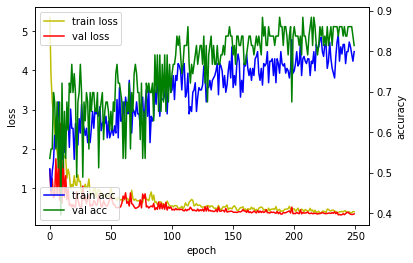

In [29]:
# Visualize loss and accuracy as learning progresses
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [30]:
# Test Set Evlautaion
model.evaluate(X_test.values,Y_test.values)[1]

3/3 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8132


0.8131868243217468

In [31]:
# if normalized
model=nn_model()
hist=model.fit(X_train_s,Y_train_s,validation_split=0.2,epochs=20)

Epoch 1/20
6/6 [==============================] - 1s 46ms/step - loss: 0.6037 - accuracy: 0.7312 - val_loss: 0.5034 - val_accuracy: 0.8837
Epoch 2/20
6/6 [==============================] - 0s 11ms/step - loss: 0.5434 - accuracy: 0.7669 - val_loss: 0.4296 - val_accuracy: 0.8837
Epoch 3/20
6/6 [==============================] - 0s 11ms/step - loss: 0.4822 - accuracy: 0.7571 - val_loss: 0.3859 - val_accuracy: 0.9070
Epoch 4/20
6/6 [==============================] - 0s 11ms/step - loss: 0.5146 - accuracy: 0.7348 - val_loss: 0.3623 - val_accuracy: 0.9070
Epoch 5/20
6/6 [==============================] - 0s 16ms/step - loss: 0.4325 - accuracy: 0.8063 - val_loss: 0.3300 - val_accuracy: 0.9070
Epoch 6/20
6/6 [==============================] - 0s 14ms/step - loss: 0.4221 - accuracy: 0.8210 - val_loss: 0.3098 - val_accuracy: 0.9302
Epoch 7/20
6/6 [==============================] - 0s 13ms/step - loss: 0.3970 - accuracy: 0.8389 - val_loss: 0.2985 - val_accuracy: 0.9302
Epoch 8/20
6/6 [===========

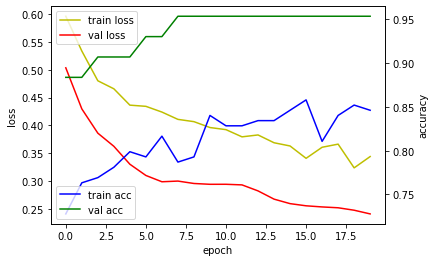

In [32]:
# Visualize loss and accuracy as learning progresses
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [33]:
# Test Set Evlautaion
model.evaluate(X_test_s,Y_test_s)[1]

3/3 [==============================] - 0s 2ms/step - loss: 0.3452 - accuracy: 0.8352


0.8351648449897766